In [3]:
import numpy as np 
import pandas as pd 

dataset = pd.read_csv('Distress.csv')

X = dataset.iloc[:,:]
y = pd.DataFrame(X.iloc[:,2])
X.drop(columns = 'Financial Distress', inplace=True)


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X_1 = LabelEncoder()
labelencoder_X_2 = LabelEncoder()
labelencoder_X_3 = LabelEncoder()

Companies = np.unique(X["Company"])
C = pd.DataFrame(labelencoder_X_1.fit_transform(X["Company"]))
columnTransformer = ColumnTransformer([("Country", OneHotEncoder(), [0])])
C = pd.DataFrame(columnTransformer.fit_transform(C).toarray())
C.columns = Companies


Time = np.unique(X["Time"])
T = pd.DataFrame(labelencoder_X_2.fit_transform(X["Time"]))
onehotencoder = ColumnTransformer([('encoder', OneHotEncoder(), [0])])
T = pd.DataFrame(onehotencoder.fit_transform(T).toarray())
T.columns = Time

Features = np.unique(X["x80"])
F = pd.DataFrame(labelencoder_X_3.fit_transform(X["x80"]))
onehotencoder = ColumnTransformer([('encoder', OneHotEncoder(), [0])])
F = pd.DataFrame(onehotencoder.fit_transform(F).toarray())
F.columns = Features

P = pd.DataFrame(pd.concat((C,T),axis = 1))

X = X.drop(["Company","Time"],axis=1)
X = pd.DataFrame(pd.concat((P,X,F),axis = 1))


y = (y<-0.5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify = y)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import keras 
from keras.models import Sequential 
from keras.layers import Dense

from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


class Metrics(Callback):
    def on_train_begin(self, logs={}):
     self.val_f1s = []
     self.val_recalls = []
     self.val_precisions = []
     
    def on_epoch_end(self, epoch, logs={}):  
     val_predict = self.model.predict_classes(self.validation_data[0])
     val_targ = self.validation_data[1]
     _val_f1 = f1_score(val_targ, val_predict)
     _val_recall = recall_score(val_targ, val_predict)
     _val_precision = precision_score(val_targ, val_predict)
     self.val_f1s.append(_val_f1)
     self.val_recalls.append(_val_recall)
     self.val_precisions.append(_val_precision)
     print(" — val_f1: %f — val_precision: %f — val_recall %f" %(_val_f1, _val_precision, _val_recall))
     return
 
metrics = Metrics()

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 30, kernel_initializer = "uniform", activation = 'relu', input_shape=(556,)))

# Adding the second hidden layer

classifier.add(Dense(units = 30, kernel_initializer = "uniform", activation = 'relu'))

# Adding the third hidden layer

classifier.add(Dense(units = 30, kernel_initializer = "uniform", activation = 'relu'))

# Adding the fourth hidden layer

classifier.add(Dense(units = 30, kernel_initializer = "uniform", activation = 'relu'))

# Adding the output layer

classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = 'sigmoid'))

# Compiling the ANN

classifier.compile(loss='binary_crossentropy',
          optimizer= "adam",
          metrics = ['accuracy']
          )

# Fitting the ANN to the Training set

#classifier.fit(x=X_train,y=y_train,batch_size = 10, epochs = 100)

from sklearn.utils import class_weight
class_weight_real = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train['Financial Distress'])
                                               ,y_train['Financial Distress'])

history = classifier.fit(X_train, y_train, 
 validation_data=(X_test, y_test),
 epochs=20,
 batch_size=200
 )

y_pred = classifier.predict_classes(X_test)
y_pred2 = classifier.predict_classes(X_train)


cm = confusion_matrix(y_test , y_pred)

cm2 = confusion_matrix(y_train, y_pred2)


C:\Users\darya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[False  True], y=3436    False
86      False
1537    False
2060    False
3667    False
2770    False
1925    False
2075    False
1918    False
950     False
2739    False
3263    False
462      True
2051    False
3252    False
1035    False
1249    False
2104    False
2802    False
3388    False
3161    False
2467    False
731     False
2667    False
3525    False
2732    False
2324    False
1657    False
144      True
1077    False
        ...  
3486    False
1865    False
978     False
105     False
1090    False
1952    False
554     False
1036    False
2513     True
2970    False
610     False
453     False
2893    False
287     False
267     False
1686    False
1562    False
1000    False
2361    False
1956    False
1999    False
2113    False
2187    False
2193    False
902     False
3437    False
1465    False
2813    False
842     False
109     False
Name: Financial Distress, 

Epoch 1/20
13/13 [==============================] - 0s 11ms/step - loss: 0.6888 - accuracy: 0.9039 - val_loss: 0.6822 - val_accuracy: 0.9628
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.9630 - val_loss: 0.6482 - val_accuracy: 0.9628
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5957 - accuracy: 0.9630 - val_loss: 0.4910 - val_accuracy: 0.9628
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.3318 - accuracy: 0.9630 - val_loss: 0.1739 - val_accuracy: 0.9628
Epoch 5/20
13/13 [==============================] - 0s 10ms/step - loss: 0.1109 - accuracy: 0.9630 - val_loss: 0.1551 - val_accuracy: 0.9628
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0851 - accuracy: 0.9630 - val_loss: 0.1492 - val_accuracy: 0.9628
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0675 - accuracy: 0.9630 - val_loss: 0.1410 - val_accuracy: 0.9628
Epoch 8/20
13/13 [

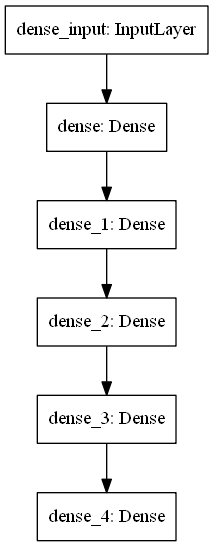

In [2]:
from keras.utils import plot_model
plot_model(classifier, to_file='model.png')

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


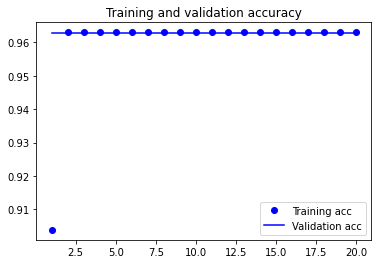

In [17]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

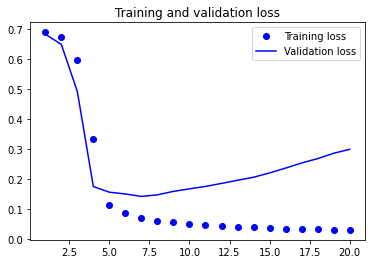

In [18]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()